In [1]:
import pandas as pd

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [2]:
# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
column_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5", "Poker Hand"]
poker_train = pd.read_csv('poker-training.data', header=None, names=column_names)
poker_test = pd.read_csv('poker-testing.data', header=None, names=column_names)
print("First 5 testing data")
poker_test.head()

First 5 testing data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [4]:
print("First 5 training data")
poker_train.head()

First 5 training data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [5]:
# Assuming you have already loaded the dataset using Pandas and assigned it to a DataFrame called 'df'
X_train = poker_train.drop('Poker Hand', axis='columns') # Features (all columns except the target column 'label')
Y_train = poker_train["Poker Hand"]  # Target column

X_test = poker_test.drop('Poker Hand', axis='columns')
Y_test = poker_test["Poker Hand"]

In [6]:
#LightBoost
# Create the LightGBM classifier model
model = lgb.LGBMClassifier(learning_rate=0.1, num_leaves=31, n_estimators=100, max_depth=6, objective='multiclass')

# Fit the model on the training data
model.fit(X_train, Y_train)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 25010, number of used features: 10
[LightGBM] [Info] Start training from score -0.694107
[LightGBM] [Info] Start training from score -0.858516
[LightGBM] [Info] Start training from score -3.031967
[LightGBM] [Info] Start training from score -3.886755
[LightGBM] [Info] Start training from score -5.594432
[LightGBM] [Info] Start training fro

LGBMClassifier(max_depth=6, objective='multiclass')

In [10]:
# Predict the target labels for the test data
Y_pred = model.predict(X_test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [11]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.600878


In [12]:
model.score(X_test, Y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.600878

In [16]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.5861216684359661
Recall 0.600878
Precision 0.5849254880425778


In [13]:
score = classification_report(Y_test, y_pred)
print("Score:", score)

Score:               precision    recall  f1-score   support

           0       0.65      0.77      0.70    501209
           1       0.58      0.51      0.54    422498
           2       0.20      0.04      0.07     47622
           3       0.20      0.05      0.08     21121
           4       0.03      0.03      0.03      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.01      0.01      1424
           7       0.00      0.01      0.00       230
           8       0.00      0.08      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.60   1000000
   macro avg       0.17      0.15      0.14   1000000
weighted avg       0.58      0.60      0.59   1000000



In [14]:
cm = confusion_matrix(Y_test, y_pred)
print(cm )

[[383674 102223   1582   1102   1083   5180   2193   1799   1779    594]
 [189202 214222   5201   2206   1721   4253   2044   1919   1318    412]
 [  9250  34588   1878    491    264    469    265    248    127     42]
 [  3952  14876    620    977    157    221    144    118     44     12]
 [   438   3201     22     12    102     32     13     30     30      5]
 [  1575    265      4      0      3      5     20      3    113      8]
 [    81   1060    166     66      8     14     17      9      2      1]
 [    10    148     20     43      3      2      2      2      0      0]
 [     1      8      0      0      1      0      1      0      1      0]
 [     1      2      0      0      0      0      0      0      0      0]]


In [17]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 1.410312
G-Mean 0.0
kappa 0.27170920359620265
MCC 0.2750437598745469


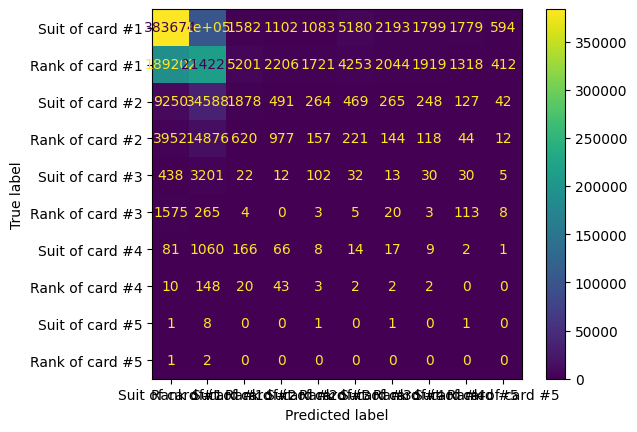

In [15]:
matrix_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=matrix_names)
disp.plot()
plt.grid(False)

In [18]:
#WITH SAMPLING 

from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with desired settings
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)


In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Instantiate the LightGBM model
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, num_leaves=31)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 124930, number of used features: 10
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training fr

In [20]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

print(accuracy)

0.520024


In [21]:
model.score(X_test, Y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.520024

In [22]:
score = classification_report(Y_test, y_pred)
print("Score:", score)

Score:               precision    recall  f1-score   support

           0       0.68      0.69      0.68    501209
           1       0.58      0.37      0.45    422498
           2       0.09      0.24      0.13     47622
           3       0.09      0.24      0.13     21121
           4       0.05      0.22      0.08      3885
           5       0.14      0.53      0.23      1996
           6       0.00      0.04      0.01      1424
           7       0.00      0.02      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.52   1000000
   macro avg       0.16      0.23      0.17   1000000
weighted avg       0.59      0.52      0.54   1000000



In [23]:
cm = confusion_matrix(Y_test, y_pred)
print("Matrix:" , cm )

Matrix: [[346714  83119  41083  15266   3299   4129   6236    694    274    395]
 [154506 155031  62236  29564   9167   1983   8142   1002    354    513]
 [  5265  22253  11207   5063   2160     90   1331    157     56     40]
 [  3736   7339   3226   5118   1053      1    486    117     13     32]
 [   484   1146    483    598    848      2    240     27     42     15]
 [   751     32     26     22      9   1050     51      0     19     36]
 [     8    521    376    337    122      0     51      9      0      0]
 [     9     36     30    125     23      0      2      5      0      0]
 [     0      0      0      1      4      2      4      0      0      1]
 [     1      0      0      0      0      2      0      0      0      0]]


In [26]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.5861216684359661
Recall 0.600878
Precision 0.5849254880425778


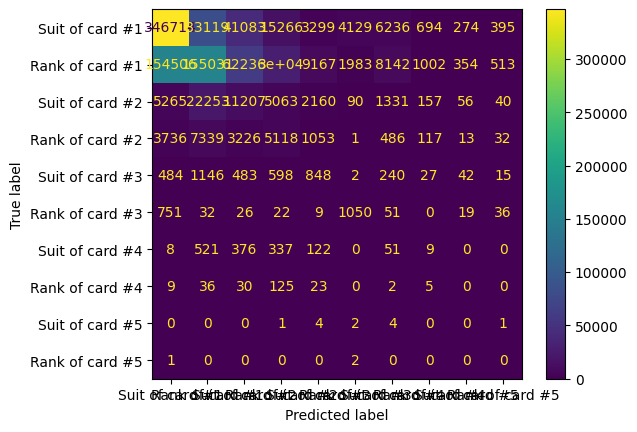

In [24]:
matrix_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=matrix_names)
disp.plot()
plt.grid(False)

In [25]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 1.410312
G-Mean 0.0
kappa 0.27170920359620265
MCC 0.2750437598745469
